# Data Bootcamp Midterm Project

Haanbi Kim, Kenton Palmer

## Preliminaries

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.gridspec as gridspec
import numpy as np

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# import dataset
df = pd.read_csv('DB_MidtermSampleData_Mar21.csv')
df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,4.849139e-01,1.406462e+00
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455,6.467172e-07,6.981965e-07
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,3.127633e+01,2.168564e+01
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.103364,3.428746e+00,4.043797e-03
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.189915,4.131975e-05,1.567777e-03
...,...,...,...,...,...,...,...,...,...
2379029,International Business Machines Corporation,Information Technology,2015-09,empty,Northern Europe,male,981.675002,3.283342e+01,2.577147e+01
2379030,IQVIA,Information Technology,2018-07,empty,South-Eastern Asia,male,47.651149,1.246570e+00,5.287461e-01
2379031,"Delta Air Lines, Inc.",Industrials,2016-10,administrative,Northern Africa,female,0.000000,0.000000e+00,0.000000e+00
2379032,"HCA Healthcare, Inc.",Health Care,2017-05,empty,Northern Europe,male,19.443301,6.653489e-01,5.603069e-01


In [5]:
### Fixes/addition to make

# General: Write Markdowns; make code more legible? add comments

# Scenario 1: think of better ways to format; align axes

# Scenario 2: add insight/subplots on the graphs

# Scenario 3: Maybe make the graphs more interactive using plotly; add insight on the graphs

# Scenario 4:  add insight on the graphs; make colors on the line plots more readable

### Requirements

https://reveliolabs.s3.us-east-2.amazonaws.com/DB_MidtermSampleData_Mar21.csv, create a Jupyter Notebook that asks and answers a question about the workforce of any, or all, of the companies listed. You may address just one company, an industry, the 10 largest or all of them... there are no requirements on what question you may ask other than that it is interesting (Does Facebook have more software engineers than Walmart is not interesting).
<br>
<br>
This project is intended to be open ended. You will all start with the same dataset on employment data for xxx companies. The question you choose to answer with that data, however, is up to you, as are the methods you use.
<br>
<br>
Unlike the problem sets, there is no specific "checklist" you have to follow in order to get a good grade on this, as long as you demonstrate the following:
<br>
<br>
*Comprehensive use of python code & concepts learned over the semester thus far (30%)*
<br>
<br>
*Depth of project analysis, i.e. how many scenarios/“experiments” did you test (30%)*
<br>
<br>
*Interpretation of data results (30%)*
<br>
<br>
*Readability/reproducibility of code/visualizations. How easy is it for someone else to understand what you are doing with your code? Would someone be able to replicate it for another project? Are your graphs legible? Do they have titles, appropriate axis, easily understood legends (10%)?*

## Scenario 1: Largest Employing Companies by Region and Sector - 2019 & 2020

In this section we are finding the top five largest firms by sector and region during 2019 and 2020, two different experiments to compare pre-COVID and post-COVID impacts on total employment and in independent firms
<br>
<br>
In the following code, we are plotting the five most competitive companies in each sector based on how often its count in the dataset and utilizing a horizontal barplot to do so and see if any changes in the top companies has changed


**Questions Addressed**: Which companies have the highest employment in each sector? Which companies have the highest employment in each region of the world? Do we see any changes in this dynamic from pre- to post-COVID (i.e. do we see any changes in the top 5 from 2019 to 2020)? 

### *1.1: Largest Companies by Employment in Each Sector: 2020*

In [134]:
# Sectors available
df.sector.unique()

array(['Information Technology', 'Financials', 'Industrials',
       'Consumer Discretionary', 'Consumer Staples', 'Communication',
       'Health Care'], dtype=object)

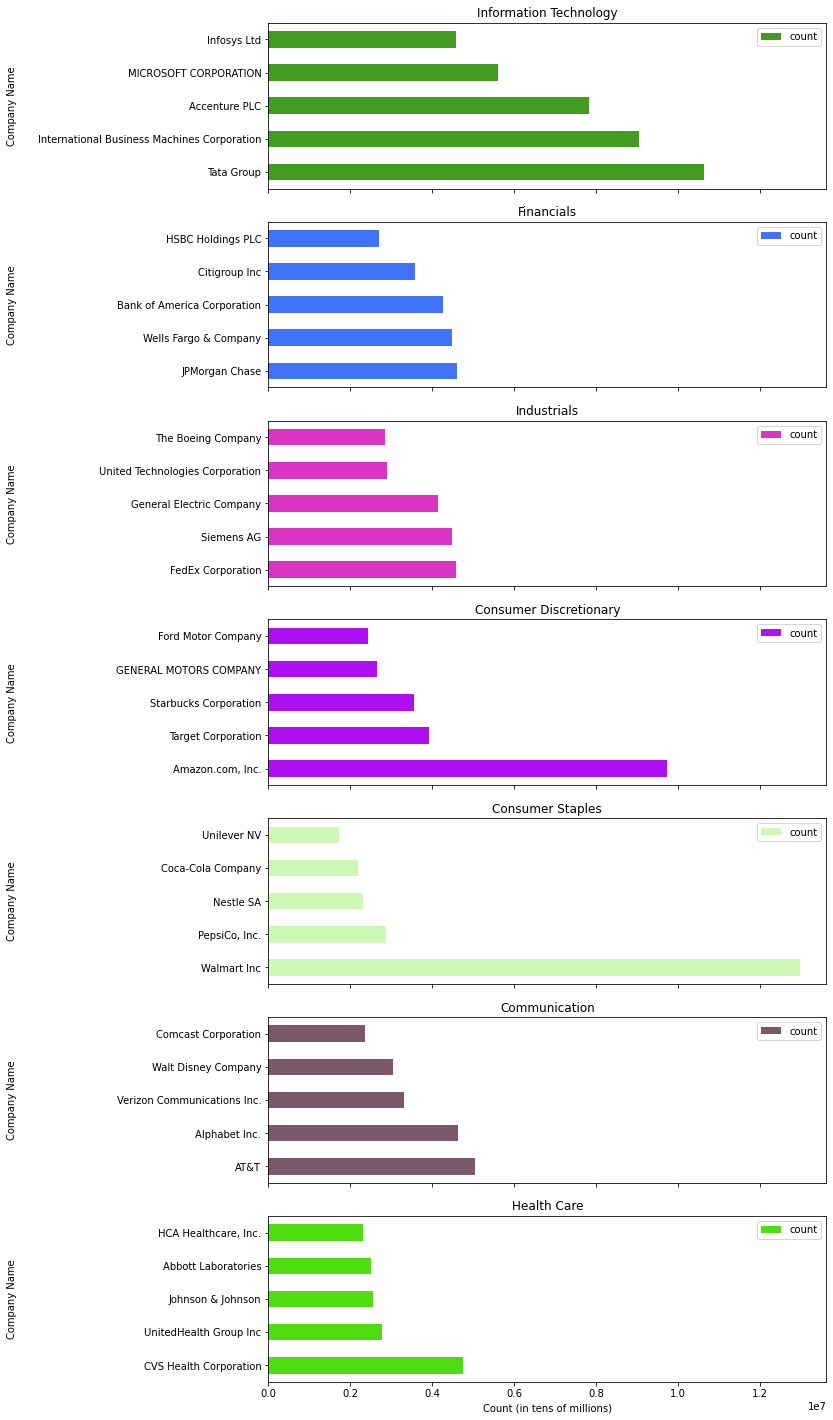

In [125]:
# Create subplots
fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)

# Create list of tuples with length of the number of total sectors in the dataset and containing a random float between 0 and 1.0
# to reflect an rgb color scheme for the bars of each sector using list comprehension. We will be utilizing this list for 
# subsequent sections that make cross-sector analysis
colors_sec = [(np.random.random(), np.random.random(), np.random.random()) for i in df.sector.unique()]

row=0
for i in df.sector.unique():
    df.loc[(df['sector'] == i) & (df['month'] >= '2020-01'), 
           ['company','count']].groupby('company').agg({'count':'sum'}).reset_index().sort_values(
        'count', ascending=False)[:5].plot.barh(ax=ax[row], x='company', y='count', figsize=(10,25), color = colors_sec[row])
    title = 'Top Companies in the ' + i + ' Sector by Employment Figures 2020'
    ax[row].set_title(i)
    ax[row].set_xlabel('Count (in tens of millions)')
    ax[row].set_ylabel('Company Name')
    ax[row].yaxis.set_label_coords(-0.45,0.5)
    row+=1


### *1.2 Largest Companies by Employment in Each Sector - 2019*

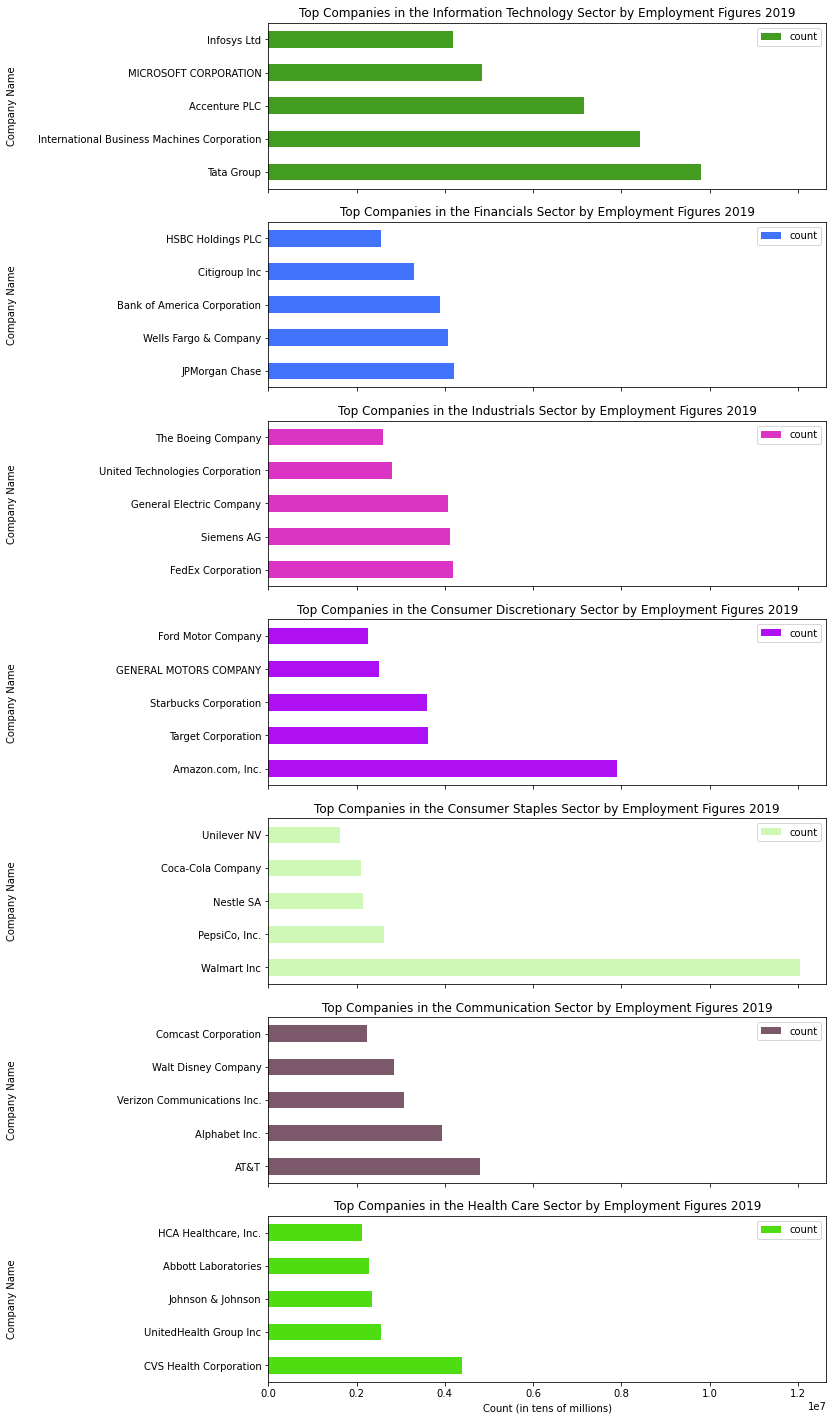

In [126]:
# Create subplots, same process as section 1.1
fig, ax = plt.subplots(nrows=7, ncols=1, sharex=True)

row=0
for i in df.sector.unique():
    df.loc[(df['sector'] == i) & ((df['month'] < '2020-01') & (df['month'] >= '2019-01')), 
           ['company','count']].groupby('company').agg({'count':'sum'}).reset_index().sort_values('count', ascending=False)[:5].plot.barh(
        ax=ax[row], x='company', y='count', figsize=(10,25), color = colors_sec[row])
    title = "Top Companies in the " + i + " Sector by Employment Figures 2019"
    ax[row].set_title(title)
    ax[row].set_xlabel('Count (in tens of millions)')
    ax[row].set_ylabel('Company Name')
    ax[row].yaxis.set_label_coords(-0.45,0.5)
    row+=1

**Commentary on Figures**:

In the next set of code, we will be doing the same thing as before, but based on regions instead of sectors

### *1.3 Largest Companies by Region - 2020*

In [135]:
# Number of regions available
df.region.unique()

array(['South America', 'Pacific Islands', 'Northern America',
       'Western Europe', 'South-Eastern Asia', 'Eastern Europe',
       'Eastern Asia', 'Northern Africa', 'Central and Western Asia',
       'Sub-Saharan Africa', 'empty', 'Southern Asia',
       'Central America and the Caribbean', 'Northern Europe',
       'Arab States', 'Southern Europe'], dtype=object)

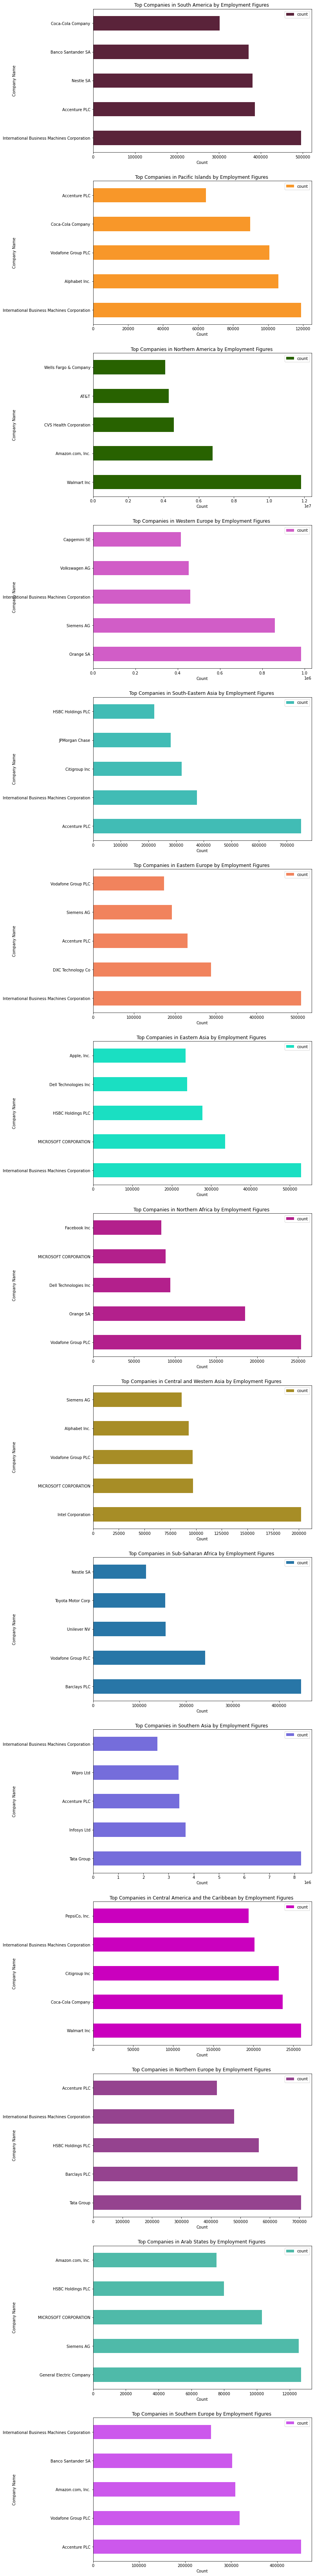

In [129]:
# Create subplots
fig, ax = plt.subplots(nrows=15, ncols=1)

# Create list of tuples with length of the number of total sectors in the dataset and containing a random float between 0 and 1.0
# to reflect an rgb color scheme for the bars of each sector using list comprehension. We will be utilizing this list for 
# subsequent sections that make cross-sector analysis

# Contrary to the other list we made for the sectors, we put a condition to rule out any rows that have the value 'empty'
# in the region column. This is also reflected in the for-loop where we just pass that iteration if i == 'empty'.
colors_reg = [(np.random.random(),np.random.random(),np.random.random()) for i in df.region.unique() if i != 'empty']

              
row = 0
for i in df.region.unique():
    if i == 'empty':
        pass
    else:
        df.loc[(df['region'] == i) & (df['month'] >= '2020-01'), ['company','count']].groupby('company').agg({'count':'sum'}).reset_index().sort_values(
            'count', ascending=False)[:5].plot.barh(ax=ax[row], x='company',y='count', figsize=(10,120), color = colors_reg[row])
        title = "Top Companies in " + i + " by Employment Figures "
        ax[row].set_title(title)
        ax[row].set_xlabel('Count')
        ax[row].set_ylabel('Company Name')
        ax[row].yaxis.set_label_coords(-0.4,0.5)
        row+=1


### *1.4 Largest Companies by Employment in each Region - 2019*

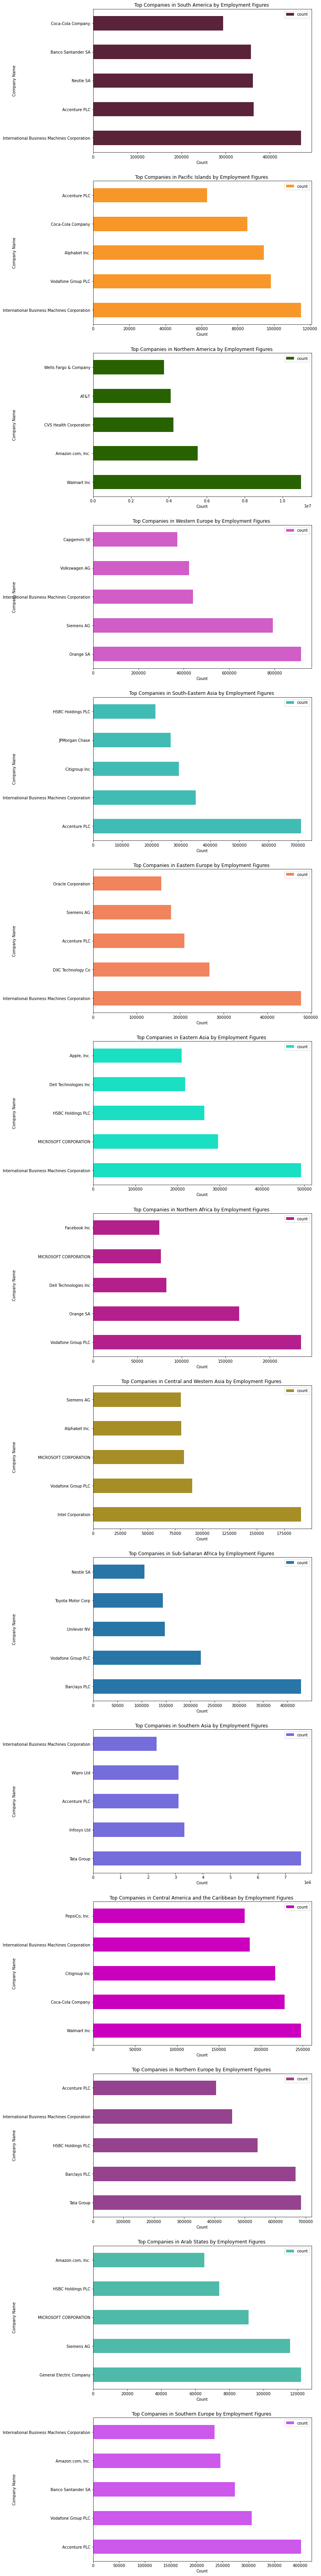

In [130]:
# Create subplots, same process as section 1.3
fig, ax = plt.subplots(nrows=15, ncols=1)

row=0
for i in df.region.unique():
    if i == 'empty':
        pass
    else:
        df.loc[(df['region'] == i) & ((df['month'] < '2020-01') & (df['month'] >= '2019-01')), ['company','count']].groupby(
            'company').agg({'count':'sum'}).reset_index().sort_values(
            'count', ascending=False)[:5].plot.barh(ax=ax[row], x='company', y='count', figsize=(10,120), color= colors_reg[row])
        title = "Top Companies in " + i + " by Employment Figures "
        ax[row].set_title(title)
        ax[row].set_xlabel('Count')
        ax[row].set_ylabel('Company Name')
        ax[row].yaxis.set_label_coords(-0.4,0.5)
        row+=1


**Commentary on Figures**:

## Scenario 2: Market Composition by Employment - 2019 & 2020

This scenario will attempt to identify levels of competition in each sector and determine whether each market is more monopolistic, competitive, or oligopolistic for factor input dominance and how this dynamic has change, if any before and after the onset of COVID-19. We are operating under the general assumption that the larger employee count (factor inputs), the larger the output. 

**Questions Addressed**:

### *2.1 Information Technology*

In [39]:
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])

In [40]:
# 1 Market competition for Info. Tech.
count_it20 = df.loc[(df['sector'] == 'Information Technology') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_it20 = df.loc[(df['sector'] == 'Information Technology') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_it19 = df.loc[(df['sector'] == 'Information Technology') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_it19 = df.loc[(df['sector'] == 'Information Technology') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_it20, labels=names_it20), row=1, col=1)
fig.add_trace(go.Pie(values=count_it19, labels=names_it19), row=1, col=2)

fig.show()

**Commentary on Figure 1**: 

### *2.2 Industrials*

In [31]:
# 2 Market Competition for Industrials
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])


count_indus20 = df.loc[(df['sector'] == 'Industrials') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_indus20 = df.loc[(df['sector'] == 'Industrials') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_indus19 = df.loc[(df['sector'] == 'Industrials') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_indus19 = df.loc[(df['sector'] == 'Industrials') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_indus20, labels=names_indus20), row=1, col=1)
fig.add_trace(go.Pie(values=count_indus19, labels=names_indus19), row=1, col=2)

fig.show()

**Commentary on Figure 2**:

### *2.3 Health Care*

In [32]:
# 3 Market Competition for Health Care
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])


count_health20 = df.loc[(df['sector'] == 'Health Care') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_health20 = df.loc[(df['sector'] == 'Health Care') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_health19 = df.loc[(df['sector'] == 'Health Care') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_health19 = df.loc[(df['sector'] == 'Health Care') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_health20, labels=names_health20), row=1, col=1)
fig.add_trace(go.Pie(values=count_health19, labels=names_health19), row=1, col=2)

fig.show()

**Commentary on Figure 3**:

### *2.4 Communication*

In [34]:
# 4 Market Competition for Communication
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])

count_comm20 = df.loc[(df['sector'] == 'Communication') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_comm20 = pd.DataFrame(df.loc[(df['sector'] == 'Communication') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False)).reset_index().company.unique()

count_comm19 = df.loc[(df['sector'] == 'Communication') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_comm19 = df.loc[(df['sector'] == 'Communication') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_comm20, labels=names_comm20), row=1, col=1)
fig.add_trace(go.Pie(values=count_comm19, labels=names_comm19), row=1, col=2 )

fig.show()

**Commentary on Figure 4**:

### *2.5 Financials*

In [36]:
# 5 Market Competition for Financials
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])

count_fin20 = df.loc[(df['sector'] == 'Financials') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_fin20 = df.loc[(df['sector'] == 'Financials') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_fin19 = df.loc[(df['sector'] == 'Financials') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_fin19 = df.loc[(df['sector'] == 'Financials') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_fin20, labels=names_fin20), row=1, col=1)
fig.add_trace(go.Pie(values=count_fin19, labels=names_fin19), row=1, col=2 )

fig.show()

**Commentary on Figure 5**:

### *2.6 Consumer Discretionary*

In [37]:
# 6 Market Competition for Consumer discretionary
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])

count_cd20 = df.loc[(df['sector'] == 'Consumer Discretionary') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_cd20 = df.loc[(df['sector'] == 'Consumer Discretionary') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_cd19 = df.loc[(df['sector'] == 'Consumer Discretionary') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_cd19 = df.loc[(df['sector'] == 'Consumer Discretionary') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_cd20, labels=names_cd20), row=1, col=1)
fig.add_trace(go.Pie(values=count_cd19, labels=names_cd19), row=1, col=2 )

fig.show()

**Commentary on Figure 6**:

### *2.7 Consumer Staples*

In [38]:
# 7 Market Competition for Consumer Staples
fig = make_subplots(rows=1, cols=2, subplot_titles = ('2020', '2019'), specs=[[{'type':'pie'},{'type':'pie'}]])

count_cs20 = df.loc[(df['sector'] == 'Consumer Staples') & (df[
    'month'] >= '2020-01') ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_cs20 = df.loc[(df['sector'] == 'Consumer Staples') & (df['month'] >= '2020-01'),[
    'company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

count_cs19 = df.loc[(df['sector'] == 'Consumer Staples') & ((df[
    'month'] < '2020-01') & (df['month'] >= '2019-01')) ,['company','count']].groupby('company')['count'].sum().sort_values(ascending=False)
names_cs19 = df.loc[(df['sector'] == 'Consumer Staples') & ((df['month'] < '2020-01') & (df['month'] >= 
    '2019-01')),['company','count']].groupby('company').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index().company.unique()

fig.add_trace(go.Pie(values=count_cs20, labels=names_cs20), row=1, col=1)
fig.add_trace(go.Pie(values=count_cs19, labels=names_cs19), row=1, col=2 )

fig.show()

**Commentary on Figure 7**:

## Scenario 3: Brain Drain Trends - 2016-2021

Which regions are experiencing a large net outflow --> brain drain?
<br>
Which sectors are experiencing a large net outflow, i.e. who doesn't want to work there anymore? --> over time (line chart)
<br>
Can these explain anything in current events?

**Questions Addressed**:

### *3.1 Net Inflow by Region: 2016-2021*

In [43]:
# create new column that addresses net inflow (inflow-outflow)
df['net_inflow'] = df['inflow'] - df['outflow']
df.head()

,company,sector,month,job_category,region,gender,count,inflow,outflow,net_inflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,4.849139e-01,1.406462e+00,-9.215483e-01
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455,6.467172e-07,6.981965e-07,-5.147928e-08
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,3.127633e+01,2.168564e+01,9.590682e+00
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.103364,3.428746e+00,4.043797e-03,3.424702e+00
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.189915,4.131975e-05,1.567777e-03,-1.526457e-03


In [41]:
df.sector.unique()

array(['Information Technology', 'Financials', 'Industrials',
       'Consumer Discretionary', 'Consumer Staples', 'Communication',
       'Health Care'], dtype=object)

In [61]:
df.loc[(df['sector'] == 'Information Technology') & (df['month'] >= '2016-01'), ['month','net_inflow']].sort_values('month')

,month,net_inflow
180117,2016-01,-1.317941e-04
247837,2016-01,4.627789e-01
247835,2016-01,8.336062e-01
247834,2016-01,6.029030e-01
247833,2016-01,-2.315800e-01
...,...,...
947219,2021-01,1.178592e-01
947220,2021-01,2.045570e-01
947222,2021-01,1.072152e-01
947162,2021-01,1.697244e-01


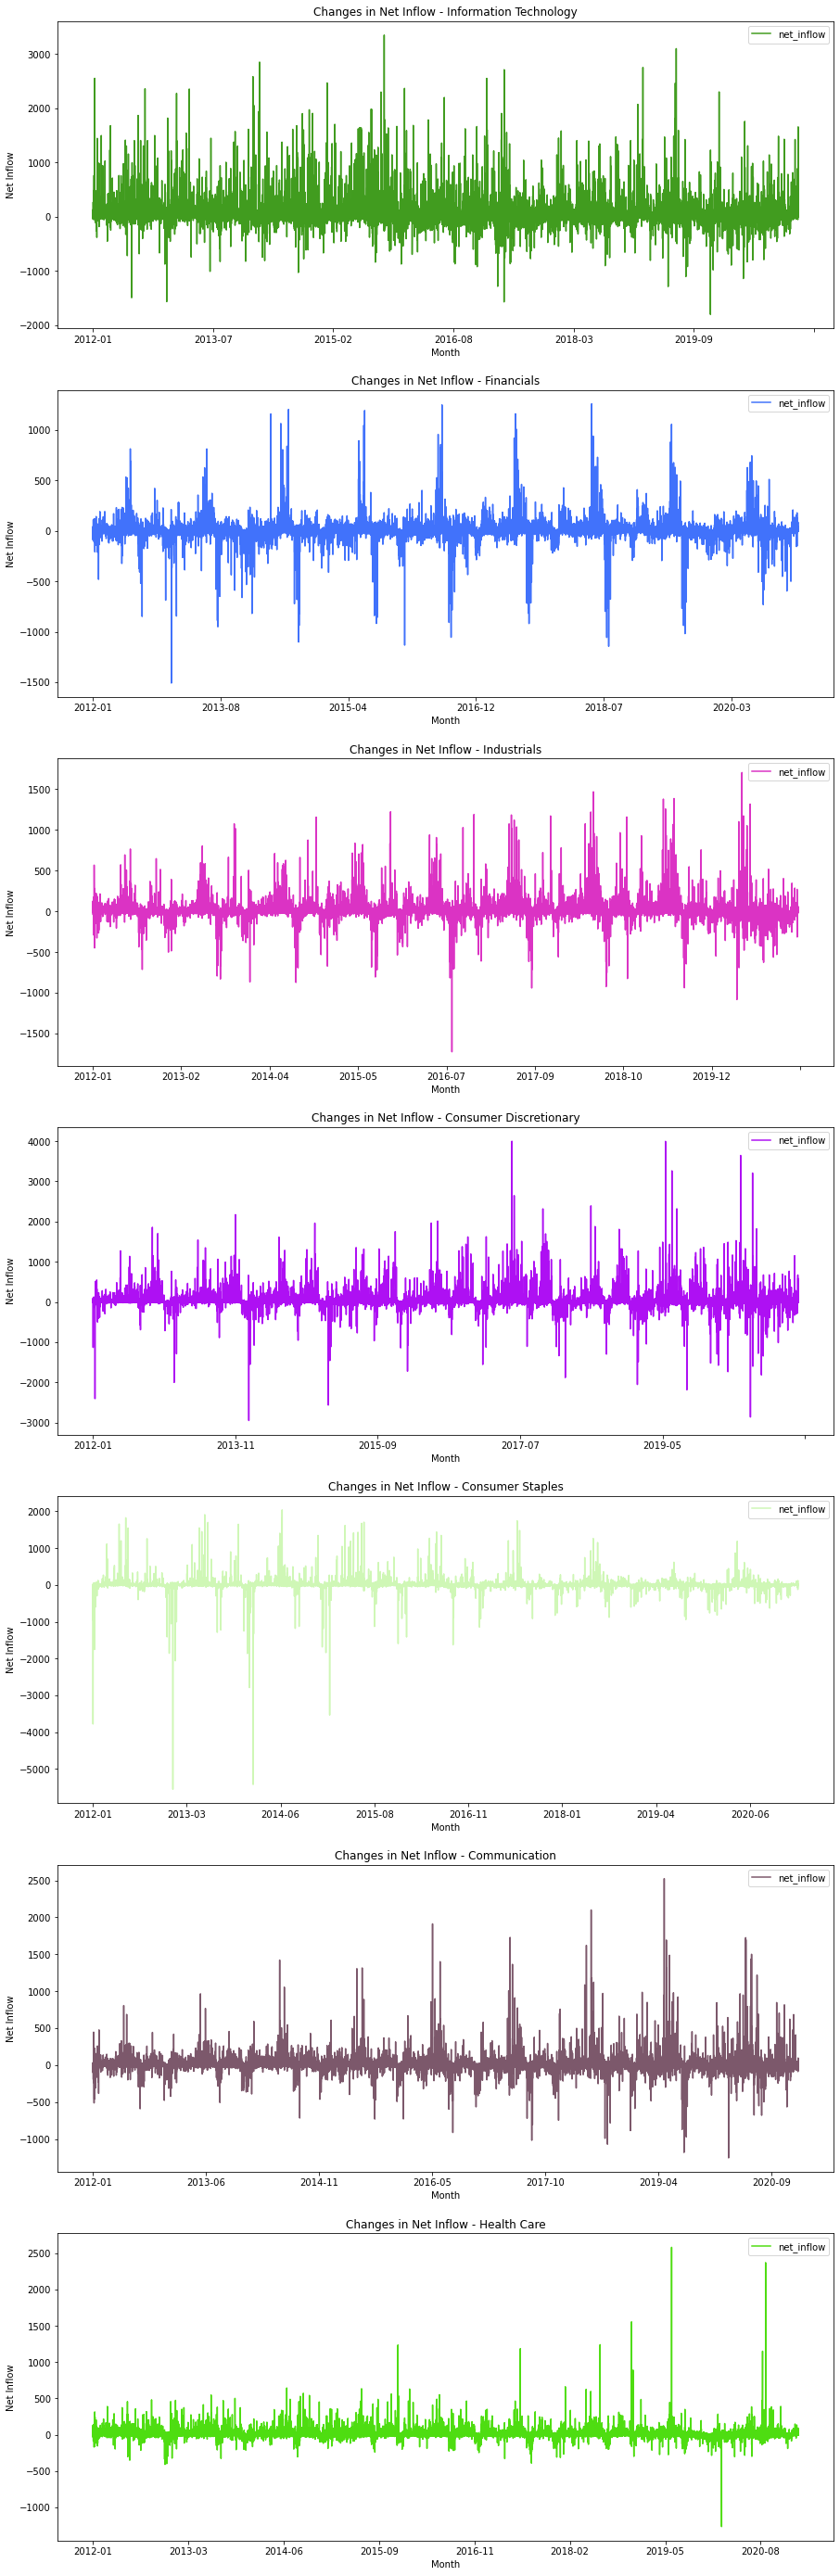

In [135]:
# Graph - Sector
fig, ax = plt.subplots(nrows=7, ncols=1)

row=0
for i in df.sector.unique():
    df.loc[(df['sector'] == i), ['month',
        'net_inflow']].sort_values('month').plot(ax=ax[row], x='month', y='net_inflow', figsize=(15,50), color=colors_sec[row])
    title = 'Changes in Net Inflow - ' + i
    ax[row].set_title(title)
    ax[row].set_xlabel('Month')
    ax[row].set_ylabel('Net Inflow')
    row+=1
   


**Commentary**:

## Scenario 4: Gender Diversity - Historical: 2012-2021

This scenario will investigate differing levels of gender diversity among sectors, regions, and job category to validate or debunk certain preconceived notions of gender diversity across sectors, job positions, and regions. In terms of historical aggregates to see how gender diversity has fared.

**Questions Addressed**:

### *4.1 Gender Diversity by Sector*

In [194]:
dfgen_sec = df.loc[df['month'] >= '2020-01'].groupby(['sector','gender']).agg({'count':'sum'})
dfgen_sec = (dfgen_sec / dfgen_sec.groupby(level=0).transform('sum')).reset_index()
dfgen_sec.head()

,sector,gender,count
0,Communication,female,0.412395
1,Communication,male,0.587605
2,Consumer Discretionary,female,0.426679
3,Consumer Discretionary,male,0.573321
4,Consumer Staples,female,0.482401


Text(0.5, 0, 'Sector')

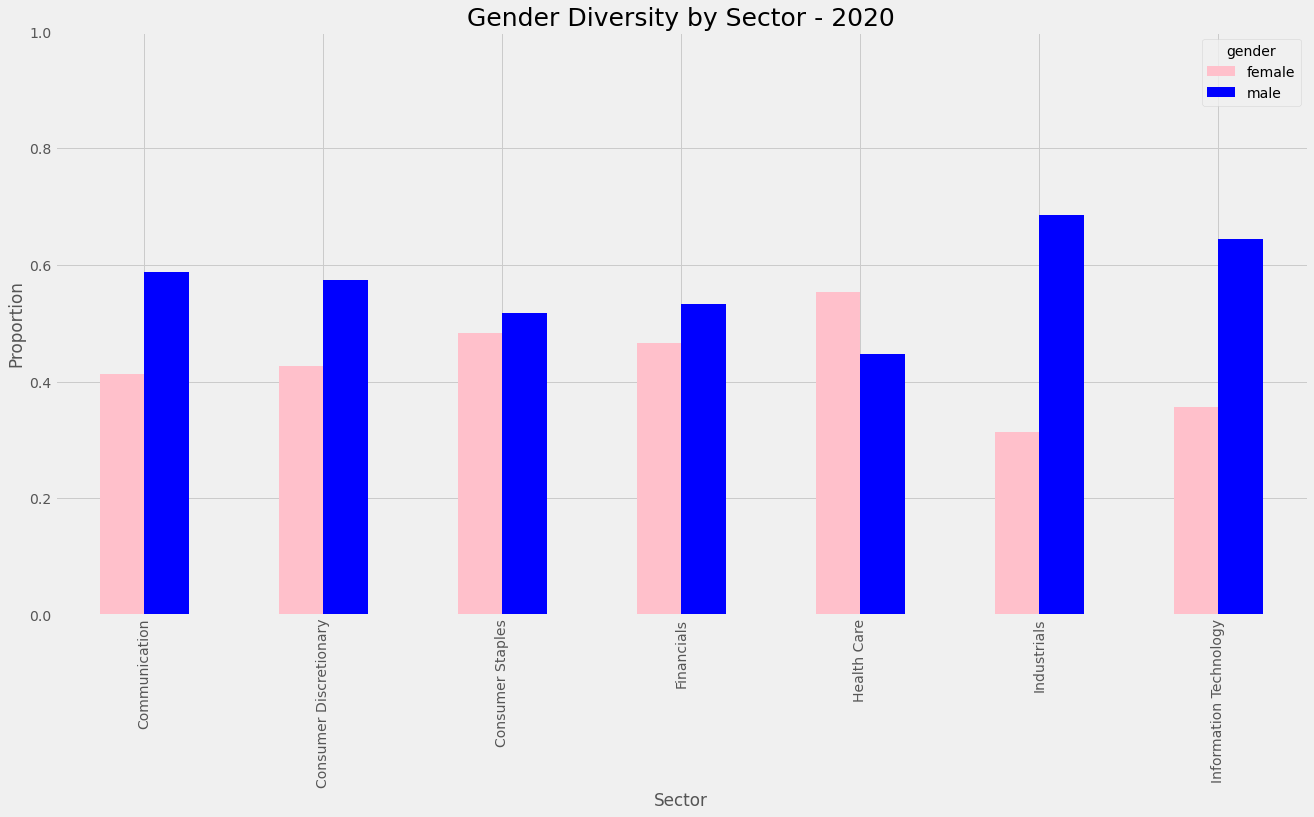

In [189]:
plt.style.use('dark_ba')
fig,ax=plt.subplots()

dfgen_sec.pivot(index='sector',columns='gender',values='count').plot.bar(ax=ax, color = ['pink','blue'], figsize=(20,10))
ax.set_ylim((0,1.0))
ax.set_title('Gender Diversity by Sector - 2020', fontsize=25)
ax.set_ylabel('Proportion')
ax.set_xlabel('Sector')

In [85]:
dfgen_sec_his = df.groupby(['month','sector','gender']).agg({'count':'sum'})
dfgen_sec_his = (dfgen_sec_his / dfgen_sec_his.groupby(level=[0,1]).transform('sum')).reset_index()
dfgen_sec_his.drop(dfgen_sec_his[dfgen_sec_his['gender'] == 'male'].index, inplace = True)

dfgen_sec_his.head()

,month,sector,gender,count
0,2012-01,Communication,female,0.412510
2,2012-01,Consumer Discretionary,female,0.435732
4,2012-01,Consumer Staples,female,0.480875
6,2012-01,Financials,female,0.470528
8,2012-01,Health Care,female,0.538515


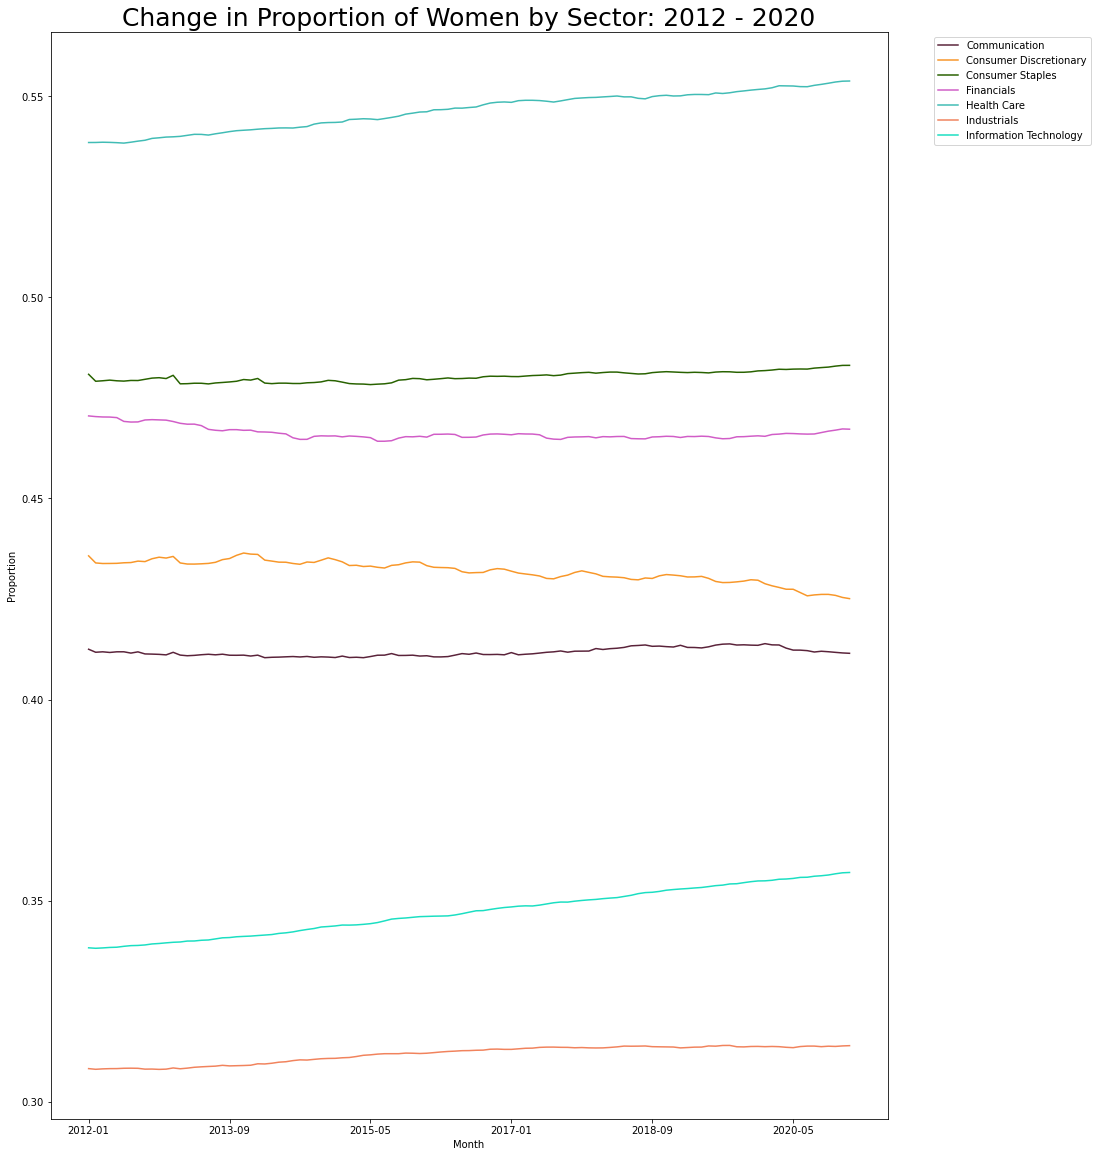

In [133]:
# randomize colors of the lines by randomizing an rgb color scheme using a list comprehension
colors = [(np.random.random(),np.random.random(),np.random.random()) for i in range(len(dfgen_sec_his.sector.unique()))]

fig, ax = plt.subplots()
dfgen_sec_his.pivot(index='month',columns='sector',values='count').plot.line(ax=ax, figsize=(15,20), color=colors_reg)
ax.set_title('Change in Proportion of Women by Sector: 2012 - 2020', fontsize=25)
ax.set_xlabel('Month')
ax.set_ylabel('Proportion')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

**Commentary**:

### *4.2 Gender Diversity by Job Category*

In [ ]:
#differentiate by job category and store into a new dataframe
#some job categories are marked as empty, so we will drop those rows from consideration
dfgen_job = df.loc[(df['month'] >= '2020-01') & (df['job_category'] != 'empty')].groupby([
    'job_category','gender']).agg({'count':'sum'})
dfgen_job = (dfgen_job / dfgen_job.groupby(level=0).transform('sum')).reset_index()

Text(0.5, 1.0, 'Gender Diversity by Job Category: 2020')

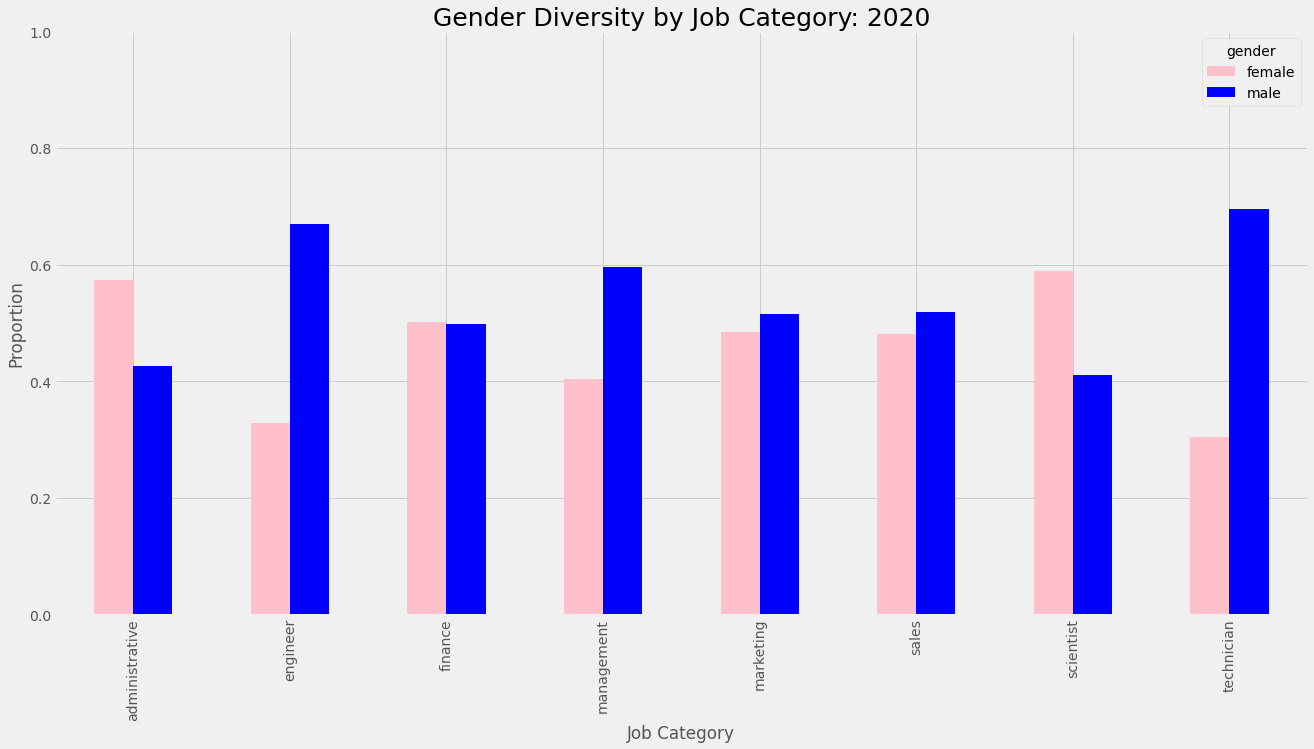

In [191]:
fig, ax = plt.subplots()
dfgen_job.pivot(index='job_category',columns='gender',values='count').plot.bar(ax=ax, color=['pink','blue'], figsize = (20,10))
ax.set_ylim((0,1.0))
ax.set_xlabel('Job Category')
ax.set_ylabel('Proportion')
ax.set_title('Gender Diversity by Job Category: 2020', fontsize=25)

In [104]:
dfgen_job_his = df.groupby(['month','job_category','gender']).agg({'count':'sum'})
dfgen_job_his = (dfgen_job_his / dfgen_job_his.groupby(level=[0,1]).transform('sum')).reset_index()
dfgen_job_his.drop(dfgen_job_his[dfgen_job_his['gender'] == 'male'].index, inplace = True)
dfgen_job_his.drop(dfgen_job_his[dfgen_job_his['job_category'] == 'empty'].index, inplace = True)

dfgen_job_his.head()

,month,job_category,gender,count
0,2012-01,administrative,female,0.561600
4,2012-01,engineer,female,0.315733
6,2012-01,finance,female,0.507949
8,2012-01,management,female,0.396074
10,2012-01,marketing,female,0.471487


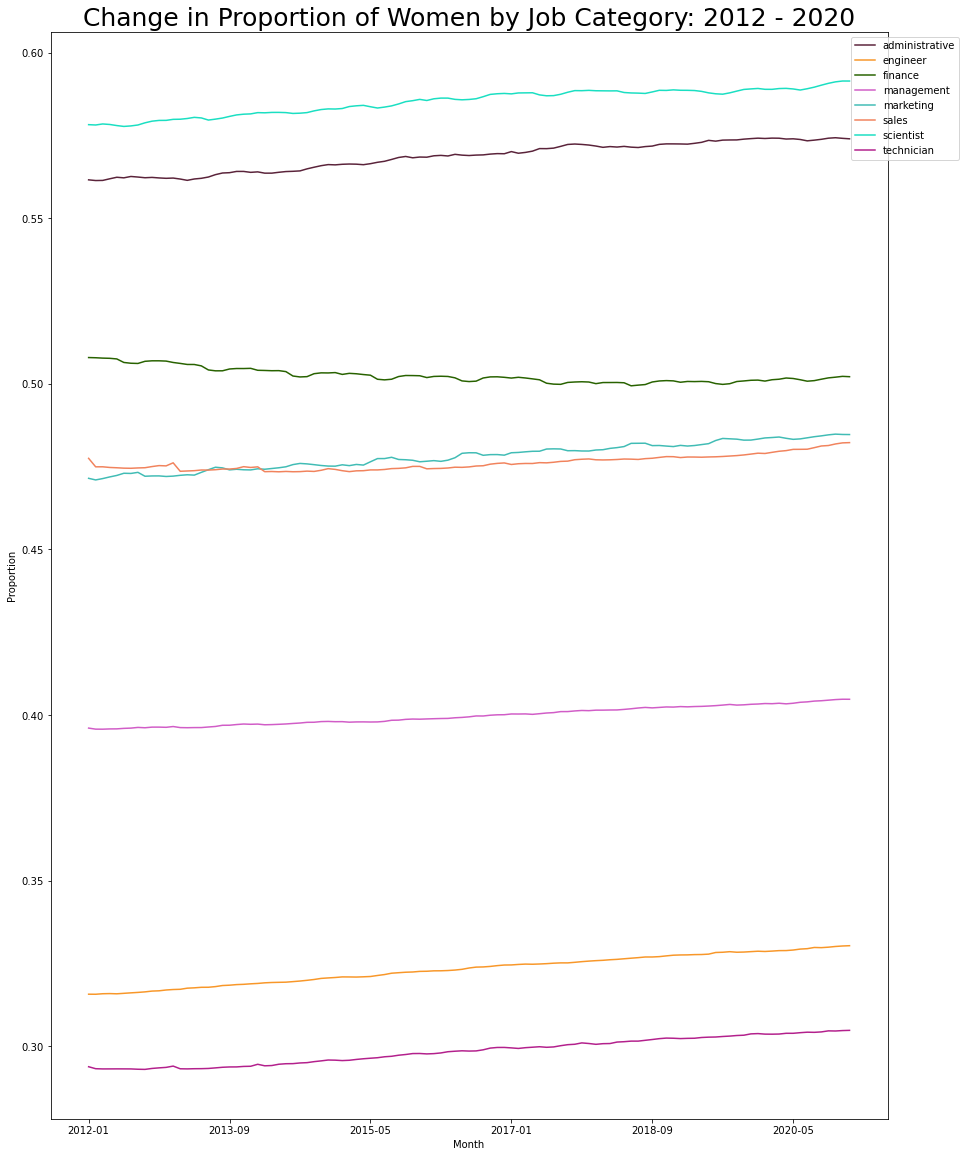

In [132]:
# change colors
colors = [(np.random.random(),np.random.random(),np.random.random()) for i in range(len(dfgen_job_his.job_category.unique()))]

fig, ax = plt.subplots()
dfgen_job_his.pivot(index='month',columns='job_category',values='count').plot.line(ax=ax, figsize=(15,20), color=colors_reg)
ax.set_title('Change in Proportion of Women by Job Category: 2012 - 2020', fontsize=25)
ax.set_xlabel('Month')
ax.set_ylabel('Proportion')
plt.legend(bbox_to_anchor=(.95, 1),loc='upper left')

**Commentary**:

In [107]:
dfgen_reg = df.loc[(df['month'] >= '2020-01') & (df['region'] != 'empty')].groupby(['region','gender']).agg({'count':'sum'})
dfgen_reg = (dfgen_reg / dfgen_reg.groupby(level=0).transform('sum')).reset_index()

dfgen_reg.head()

,region,gender,count
0,Arab States,female,0.311019
1,Arab States,male,0.688981
2,Central America and the Caribbean,female,0.394375
3,Central America and the Caribbean,male,0.605625
4,Central and Western Asia,female,0.355289


Text(0.5, 0, 'Region')

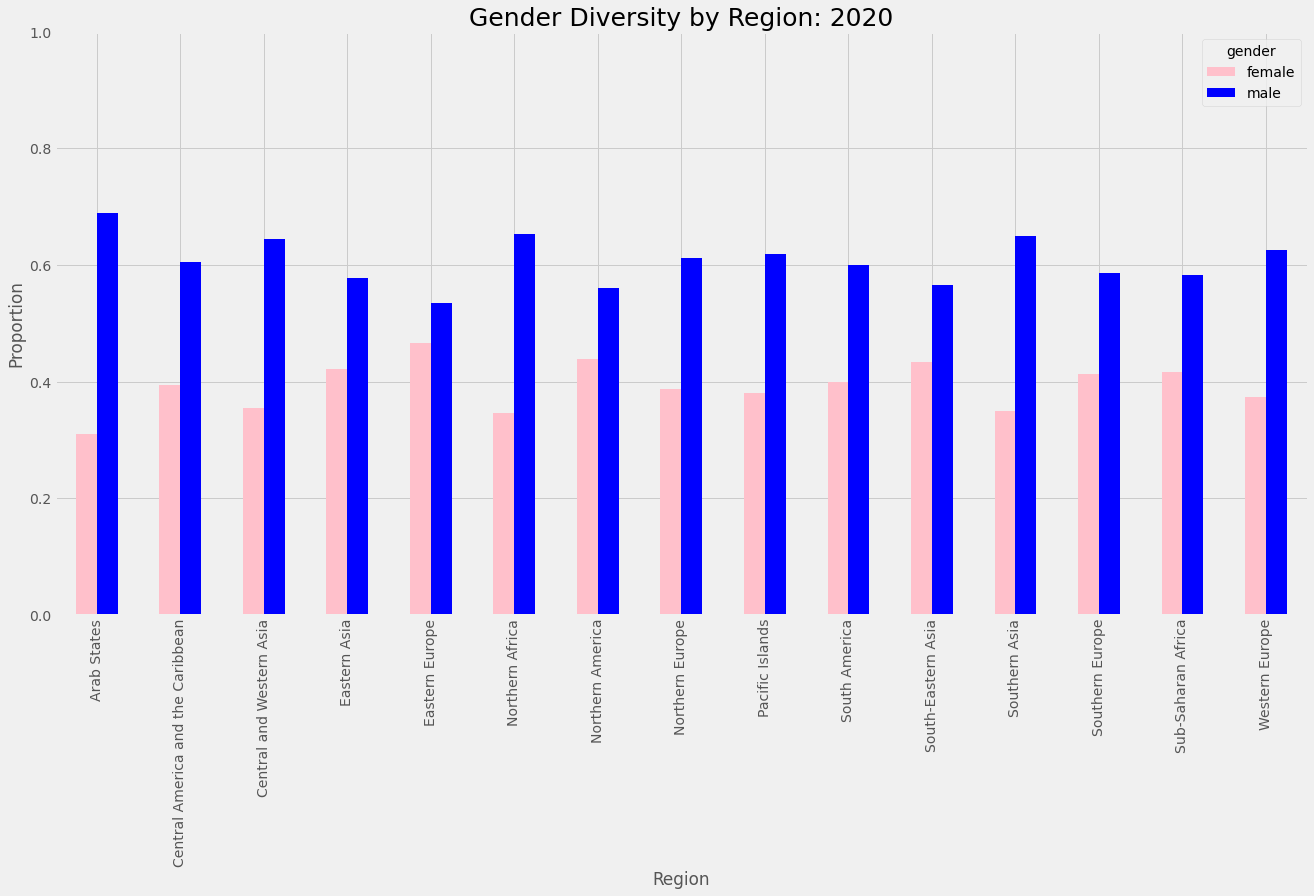

In [201]:
#differentiate by regions
#some regions are marked as empty, so we will drop those rows
fig, ax = plt.subplots()
dfgen_reg.pivot(index='region',columns='gender',values='count').plot.bar(ax=ax, color = ['pink','blue'], figsize=(20,10))
ax.set_ylim((0,1.0))
ax.set_title('Gender Diversity by Region: 2020',fontsize=25)
ax.set_ylabel('Proportion')
ax.set_xlabel('Region')

In [108]:
dfgen_reg_his = df.groupby(['month','region','gender']).agg({'count':'sum'})
dfgen_reg_his = (dfgen_reg_his / dfgen_reg_his.groupby(level=[0,1]).transform('sum')).reset_index()
dfgen_reg_his.drop(dfgen_reg_his[dfgen_reg_his['gender'] == 'male'].index, inplace = True)
dfgen_reg_his.drop(dfgen_reg_his[dfgen_reg_his['region'] == 'empty'].index, inplace = True)

dfgen_reg_his

,month,region,gender,count
0,2012-01,Arab States,female,0.299313
2,2012-01,Central America and the Caribbean,female,0.389536
4,2012-01,Central and Western Asia,female,0.353561
6,2012-01,Eastern Asia,female,0.411983
8,2012-01,Eastern Europe,female,0.454170
...,...,...,...,...
3476,2021-01,South-Eastern Asia,female,0.434831
3478,2021-01,Southern Asia,female,0.350831
3480,2021-01,Southern Europe,female,0.415164
3482,2021-01,Sub-Saharan Africa,female,0.417161


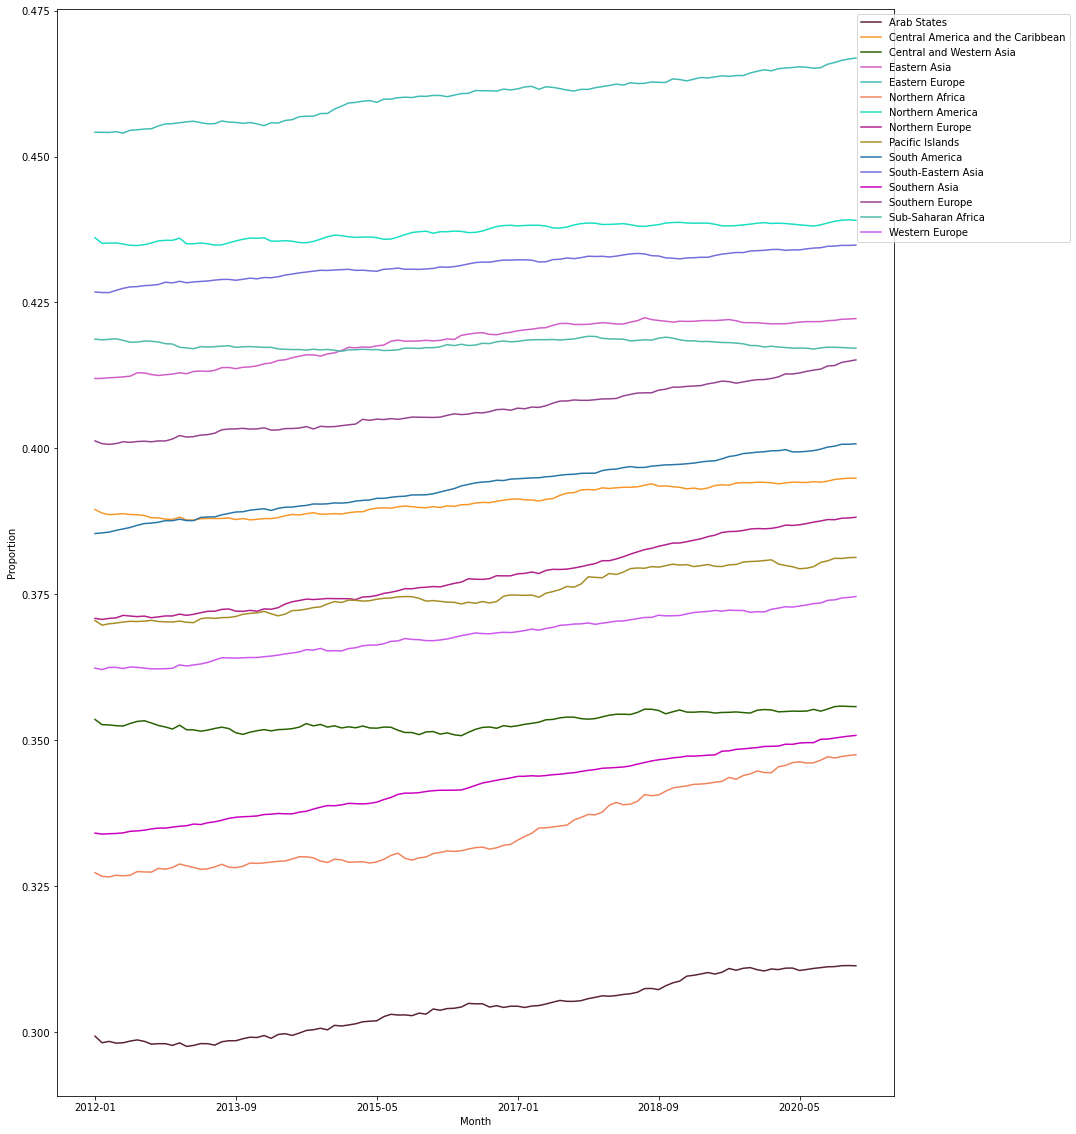

In [131]:
# change colors
colors = [(np.random.random(),np.random.random(),np.random.random()) for i in range(len(dfgen_reg_his.region.unique()))]

fig,ax = plt.subplots()
dfgen_reg_his.pivot(index='month',columns='region',values='count').plot.line(ax=ax, figsize=(15,20), color=colors_reg)
ax.set_xlabel('Month')
ax.set_ylabel('Proportion')
plt.legend(bbox_to_anchor=(.95, 1),loc='upper left')

**Commentary**:

## Final Conclusions on Dataset